# **Project Name**    - Retail sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

**Name** : KUNIKA SONI

**Email**: sonikunika901@gmail.com


# **Project Summary -**

**Role** :-

1) Data Cleaning :-
 Dealing with null values, duplicate data and outliers present in our data.

2) Exploratory Data Analysis :-
 Plotting the dependent variable and distributions of dependent and independent variables.
 Checking and visualizing the correlation between our dependent and independent variables.
 Visualizing the relationship between each pair of our variables.

3) Data Preprocessing & Feature Engineering :-
 Checking  and Dealing with multicollinearity present in our dataset.

 Scaling the data and splitting it into train and test sets.

4) Model Implementation :-
 Fitting various models on our data and optimizing them via cross-validation.
 Using these models to make predictions on test and train data.
The Models implemented are :-
1. Linear Regression
2. Lasso Regression
3. Ridge Regression


5) Data Visualization :-
 Using several kinds of charts like Line chart, scatter plot, heatmap, pair plot, distplot, boxplot etc
to better visualize data and understand correlation and trends.

6) Model performance comparison :-
 Comparison of all implemented models using various Regression evaluation metrics like Mean
absolute error, Mean squared error, RMSE, R-squared and Adjusted R-squared.

7) Conclusion :-
 Drawing some insights from the data and the predictions made by our various predictive models
on unseen (test) data.
**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset.

Analyse Regression analysis using following prediction analysis
 A. Linear Regression Analysis
 B. Elastic Regression ( Lasso and Ridge Regression).

# **GitHub Link -**

https://github.com/kunikasoni/Retail_sales_Prediction

# **Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day.

# **General Guidelines** : -  

**1**.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


 6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# importing the libraries which we'll need.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# To show all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset Loading

In [2]:
# Mounting google drive to load the data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading our dataset.
Rossmann = pd.read_csv("/content/drive/MyDrive/Regression modal/Rossmann Stores Data.csv")
Store = pd.read_csv("/content/drive/MyDrive/Regression modal/store.csv")

### Dataset First View

In [4]:
# Getting first 5 rows
Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Getting first 5 rows
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Rossmann.shape

(1017209, 9)

In [7]:
Store.shape

(1115, 10)

### Dataset Information

In [8]:
# Dataset Info
Rossmann.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
Rossmann.duplicated().sum()

0

In [11]:
Store.duplicated().sum()


0

In [12]:
#so there is no duplicate values in our dataset.

#### Missing Values/Null Values

In [13]:
# Checking for null values.
Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values in Rossmann dataset, so we are good to go..

In [14]:
Store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are multiple Nan values in columns - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values. we need to clean these data.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
Rossmann.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [16]:
Store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
# Dataset Describe
Rossmann.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

**Rossmann dataset**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**1. Id** - an Id that represents a (Store, Date) duple within the test set

**2. Store** - a unique Id for each store

**3. Sales** - the turnover for any given day (this is what you are predicting)

**4. Customers** - the number of customers on a given day

**5 .Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**6. StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**7. SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools.


**Store dataset**

**1. StoreType**- differentiates between 4 different store models: a, b, c, d.

**2. Assortment** - describes an assortment level: a = basic, b = extra, c = extended.

**3. CompetitionDistance**- distance in meters to the nearest competitor store

**4. CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened.

**5. Promo** - indicates whether a store is running a promo on that day.

**6. Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.

**7. Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2.

**8. PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store.


### Check Unique Values for each variable.

In [19]:

# Check Unique Values for each variable.
#unique variables in rossmann sales dataset.
print(Rossmann.apply(lambda col: col.unique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [20]:
#unique variables in stores dataset.
print(Store.apply(lambda col: col.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Getting the sum of null values
Store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
# Replacing the NAN values with median
Store['CompetitionDistance'].fillna(Store['CompetitionDistance'].median(), inplace = True)

# Replacing NAN values with 0 in CompetitionOpenSinceMonth
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 in CompetitionOpenSinceYear
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
Store['PromoInterval'].fillna(Store['PromoInterval'].mode().values[0], inplace = True)

In [23]:
#check missing values again
Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Dropping all the entries from 'Sales' column with Sales figure as 0. Zero sales does not give any insights.

Also, dropping all the data which has 0 in the 'Open' column. It indicates that the store was not open. We can drop this column as we are looking at sales happened and sales can only happen if the store is open.

In [24]:
Rossmann = Rossmann[Rossmann['Sales'] != 0]
Rossmann = Rossmann[Rossmann['Open'] != 0 ]
# Rows with zero sales or closed stores  have been excluded from the dataset.

In [25]:
#Dropping the open column
Rossmann.drop(['Open'], axis = 1, inplace = True)

In [26]:
#Finding the shape
Rossmann.shape

(844338, 8)

In [27]:
# Checking for null values.
Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [28]:
# Getting the info of rossmann
Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Promo          844338 non-null  int64 
 6   StateHoliday   844338 non-null  object
 7   SchoolHoliday  844338 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [29]:
# as we can see, Date column has the object datatype.
# we need to modify this before passing it to a model.

In [30]:
#this code will convert the 'Date' column elements to datetime objects.
Rossmann['Date'] = pd.to_datetime(Rossmann['Date'])


In [31]:
#so that we can perform these operations on the data.
Rossmann['Year'] = Rossmann['Date'].dt.year
Rossmann['Month'] = Rossmann['Date'].dt.month
Rossmann['Day'] = Rossmann['Date'].dt.day


In [32]:
# Now we can drop 'Date' column
Rossmann.drop(['Date'], axis = 1, inplace = True)

In [33]:
#renaming the dayofweek column to weekday
Rossmann = Rossmann.rename(columns={'DayOfWeek': 'Weekday'})

In [34]:
#The function returns 1 if the input day is either Saturday (6) or Sunday (7),
#indicating it's a weekend. Otherwise, it returns 0, indicating it's a weekday.

def weekend(val):
    if val == 6:
        return 1
    elif val == 7:
        return 1
    else:
        return 0

In [35]:
Rossmann['Weekend'] = Rossmann['Weekday'].apply(weekend)

In [36]:
Rossmann.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend
0,1,5,5263,555,1,0,1,2015,7,31,0
1,2,5,6064,625,1,0,1,2015,7,31,0
2,3,5,8314,821,1,0,1,2015,7,31,0
3,4,5,13995,1498,1,0,1,2015,7,31,0
4,5,5,4822,559,1,0,1,2015,7,31,0


In [37]:
# getting descriptive statistics of the data.
Rossmann.describe()

,Store,Weekday,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Weekend
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,0.446356,0.193578,2013.831945,5.845774,15.835706,0.174865
std,321.730861,1.723712,3103.815515,401.194153,0.497114,0.395102,0.777271,3.323959,8.683392,0.379852
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,2014.000000,8.000000,23.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,1.000000


In [38]:
Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [39]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [40]:
# Changing the datatype of CompetitionDistance from float to int
Store['CompetitionDistance'] = Store['CompetitionDistance'].astype(int)

# Changing the datatype of CompetitionOpenSinceMonth from float to int
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].astype(int)

# Changing the datatype of Promo2SinceWeek from float to int
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].astype(int)

# Changing the datatype of CompetitionOpenSinceYear from float to int
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].astype(int)

# Changing the datatype of Promo2SinceYear from float to int
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].astype(int)

In [41]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB


In [42]:
# Here we are merging two dataset.(1.Rossman 2.Store)
df = pd.merge(Rossmann, Store, on='Store',how='left')

In [43]:
# first look of our merged dataset
df.head()

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [44]:
# Dataset Describe
df.describe()

,Store,Weekday,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Weekend,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,0.446356,0.193578,2013.831945,5.845774,15.835706,0.174865,5450.044852,4.926482,1369.692738,0.498670,11.596159,1003.201259
std,321.730861,1.723712,3103.815515,401.194153,0.497114,0.395102,0.777271,3.323959,8.683392,0.379852,7801.082007,4.283634,935.556484,0.499999,15.308101,1005.874685
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,0.000000,2325.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,2014.000000,8.000000,23.000000,0.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [45]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Store                      844338 non-null  int64 
 1   Weekday                    844338 non-null  int64 
 2   Sales                      844338 non-null  int64 
 3   Customers                  844338 non-null  int64 
 4   Promo                      844338 non-null  int64 
 5   StateHoliday               844338 non-null  object
 6   SchoolHoliday              844338 non-null  int64 
 7   Year                       844338 non-null  int64 
 8   Month                      844338 non-null  int64 
 9   Day                        844338 non-null  int64 
 10  Weekend                    844338 non-null  int64 
 11  StoreType                  844338 non-null  object
 12  Assortment                 844338 non-null  object
 13  CompetitionDistance        844338 non-null  

In [46]:
df.shape # check the shape of the data after merging the sales and store data

(844338, 20)

### What all manipulations have you done and insights you found?

We have done the following maipulation and the insights found by us are as follows :-

1). We found that there were six columns containing null values in Store dataset So we had null values in columns - CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear,Promo2SinceWeek, Promo2SinceYear ,PromoInterval.            
2). There were no duplicates values in both dataset.

3).There were new column added that is ('Weekend').

4). I converted datatype from float to integer by using .astype() method in 'CompetitionDistance', 'CompetitionOpenSinceMonth','Promo2SinceWeek','CompetitionOpenSinceYear','Promo2SinceYear' columns.

5).  And I merged two dataset one is Rossmann other one is Store.
          

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [47]:
# Grouping the year with sales for visualization
year_on_sale = df.groupby(['Year'])['Sales'].mean()
year_on_sale

Year
2013    6814.775168
2014    7026.128505
2015    7088.235123
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales Mean')

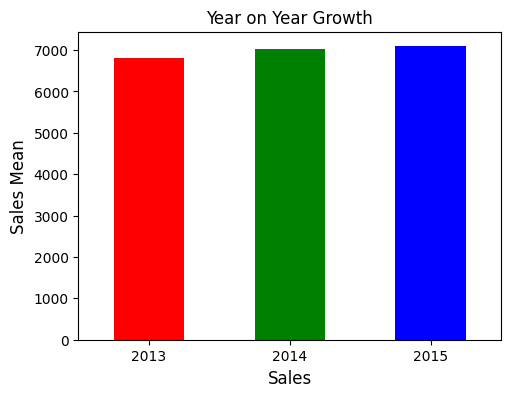

In [48]:
# Chart 1 visualization code
plt.figure(figsize = (12,4))
plt.subplot(1,2,2)
year_on_sale.plot(kind = 'bar', color = ['r', 'g', 'b'], fontsize = 10)
plt.xticks(rotation = 360)
plt.title("Year on Year Growth", fontsize = 12)
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Sales Mean",  fontsize = 12)

 In this above graph we can see Sales means gradually increased over the three years, indicating a positive trend.

#### Chart - 2

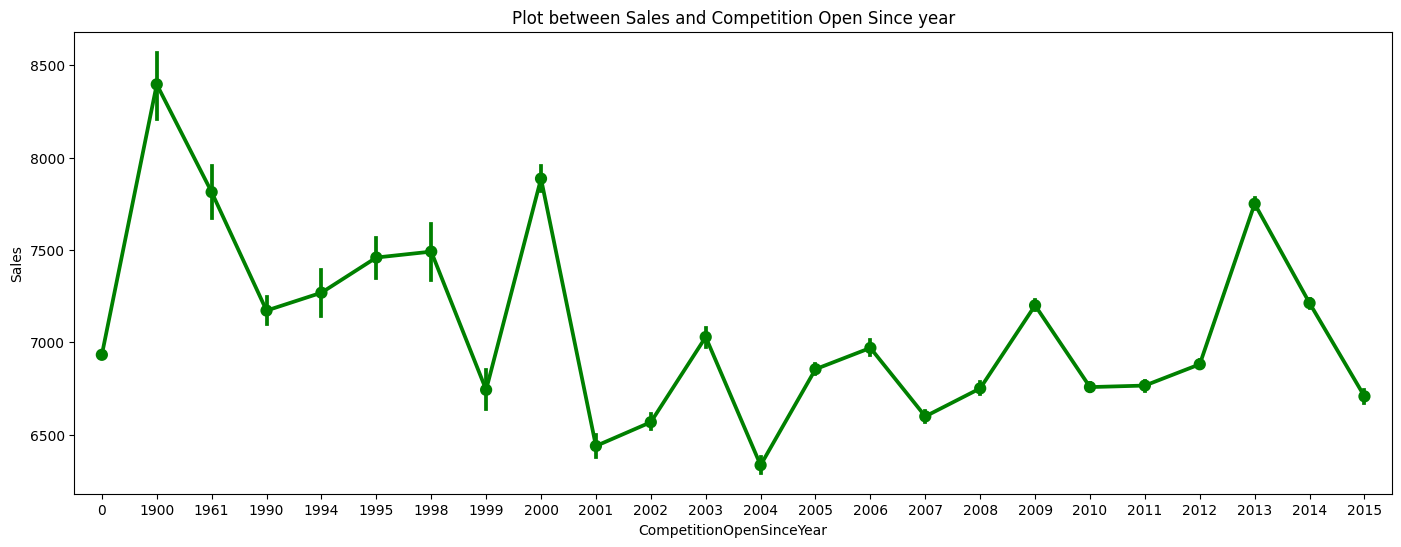

In [49]:
# chart 2 Visulaizing using point plot
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x= df['CompetitionOpenSinceYear'], y= df['Sales'], color = 'g')
plt.title('Plot between Sales and Competition Open Since year')
plt.show()

From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.

#### Chart - 3

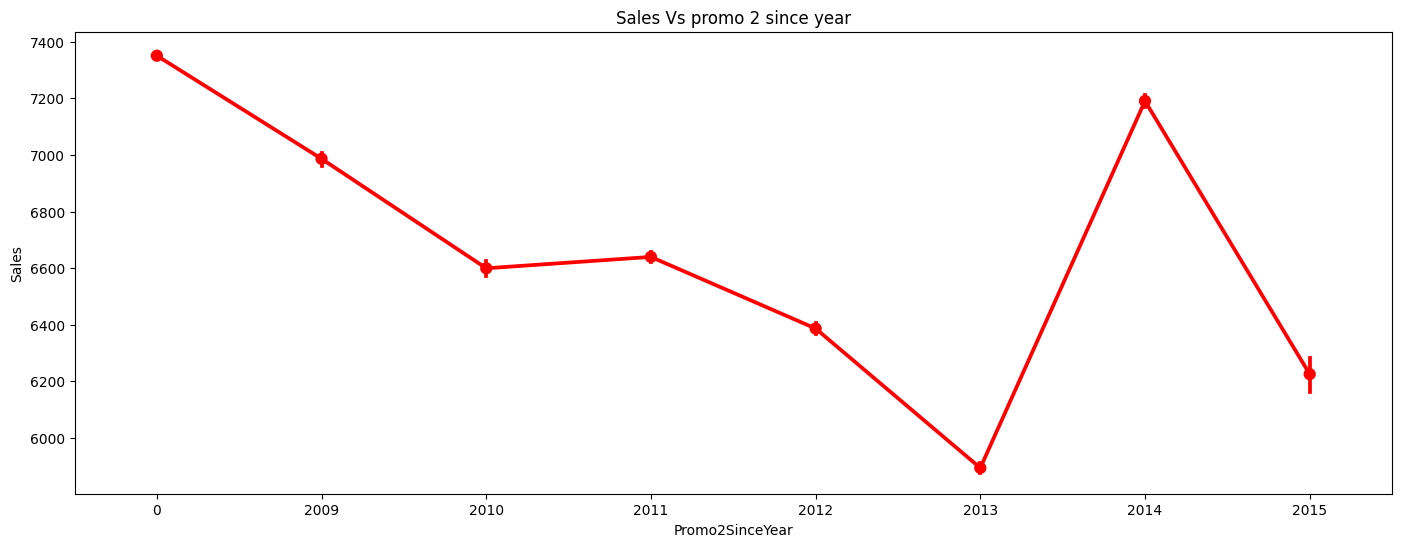

In [50]:
# chart 3 Visualization code
# Visualizing using point plot
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x = df['Promo2SinceYear'], y = df['Sales'], color = 'r')
plt.title("Sales Vs promo 2 since year")
plt.show()


From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

#### Chart - 4

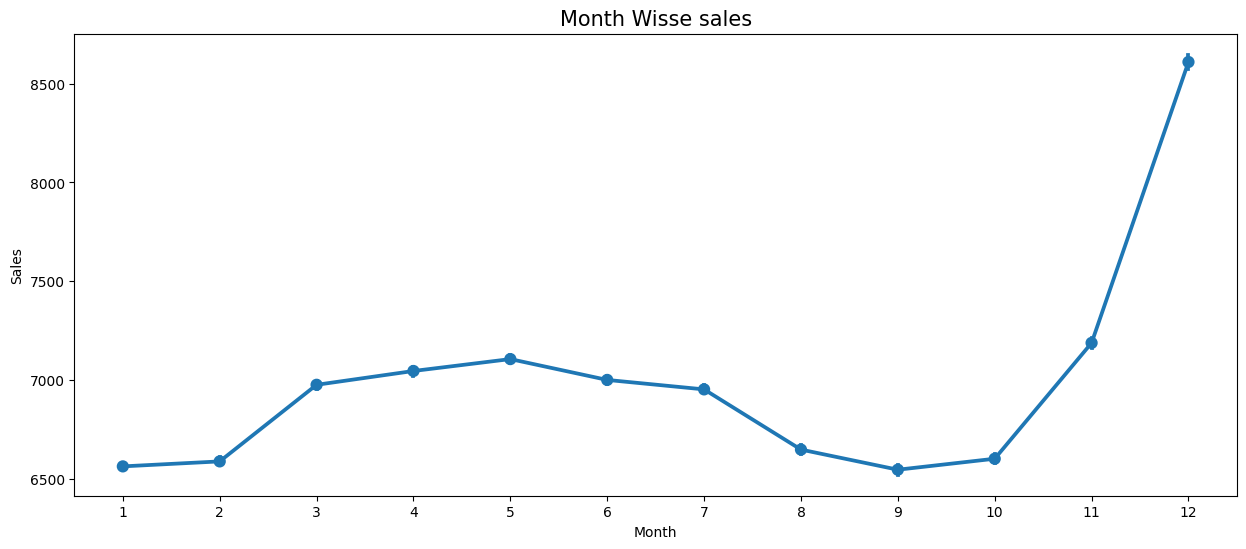

In [51]:
# Chart 4 visualization code
# Visualizing using pointplot
plt.figure(figsize = (15,6))
sns.pointplot(data = df, x = df['Month'], y = df['Sales'])
plt.title("Month Wisse sales", fontsize = 15)
plt.show()

Above chart shows that sales go increasing from November and highest in month December.

#### Chart - 5

In [52]:
df.groupby(['Weekend'])['Sales'].mean()

Weekend
0    7172.903208
1    5932.264337
Name: Sales, dtype: float64

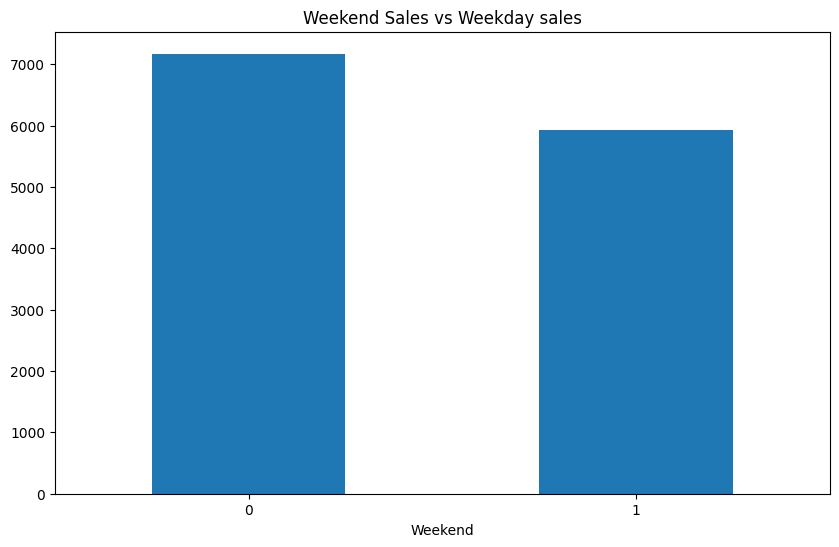

In [53]:
# chart 5 visualizing code
# Visualizing using barplot
plt.figure(figsize = (10,6))
df.groupby(['Weekend'])['Sales'].mean().plot(kind = 'bar')
plt.xticks(rotation = 360)
plt.title("Weekend Sales vs Weekday sales")
plt.show()


Here 0 for weekend and 1 for weekdays
As we can see that there is sales higher during weekends compared to weekdays.


#### Chart - 6

In [54]:
store_type = df.groupby(['StoreType'])['Sales'].mean()
store_type

StoreType
a     6925.697986
b    10233.380141
c     6933.126425
d     6822.300064
Name: Sales, dtype: float64

In [55]:
# chart 6 visualizing code

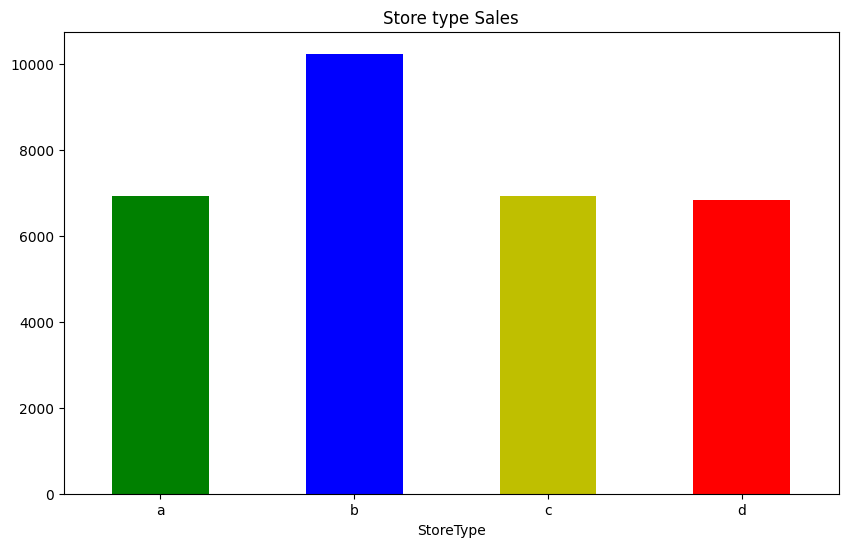

In [56]:
plt.figure(figsize = (10,6))
store_type.plot(kind = 'bar', color = ['g','b', 'y', 'r'])
plt.xticks(rotation = 360)
plt.title("Store type Sales")
plt.show()

There are four types of stores in dataset, designated as "a", "b", "c", and "d". The comparison of average sales percentage for each type shows that "b" stores have the highest average sales , while the other stores have nearly equal average sales.

#### Chart - 7

In [57]:
df.groupby(['PromoInterval'])['Sales'].mean()

PromoInterval
Feb,May,Aug,Nov     6427.367069
Jan,Apr,Jul,Oct     7123.437381
Mar,Jun,Sept,Dec    6215.888185
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Promo Interval')

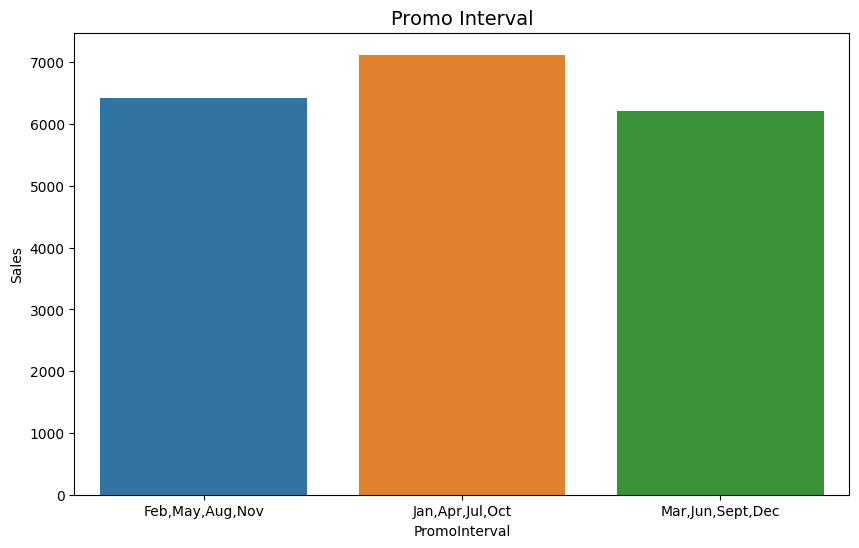

In [58]:
# Chart - 7 visualization code
# Visualizing using Barplot
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = df.groupby(['PromoInterval'])['Sales'].mean().keys(),
            y =df.groupby(['PromoInterval'])['Sales'].mean())
plt.title("Promo Interval", fontsize = 14)


Promo Interval refers to consecutive intervals in Promo 2. There are three intervals: Jan, Apr, Jul, Oct; Feb, May, Aug, Nov; and Mar, Jun, Sept, Dec. Stores that do not participate in any interval have the highest average sales. Among stores participating in the Promo Interval, the first interval (Jan, Apr, Jul, Oct) has the highest average sales compared to other intervals.



#### Chart - 8

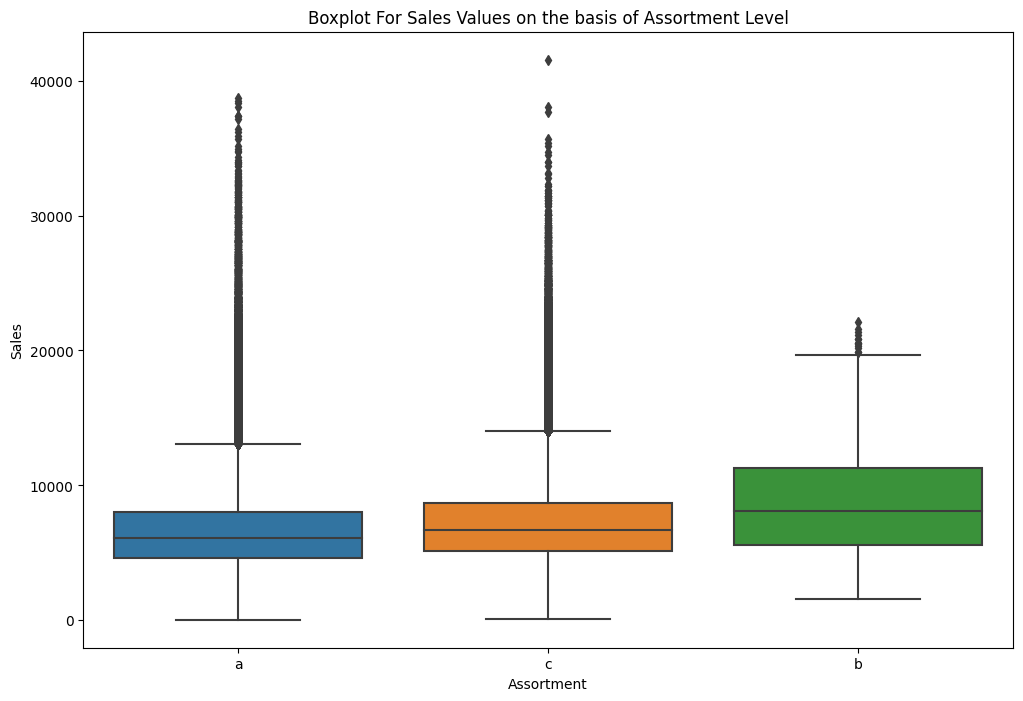

In [59]:
#Chart - 8 visualization code
# Visualizing the boxplot for assortment
plt.figure(figsize=(12, 8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')
plt.show()

Median Sales Value: The median sales value is the highest in the b type assortment.

Highest Sale Value: The highest sales occur in the c type assortment.

Maximum Sales Count: The maximum number of sales among the various assortment levels falls below 10,000 sales. Additionally, the largest number of outliers are found in the sales of both the a and c type assortment strategies.

#### Chart - 9

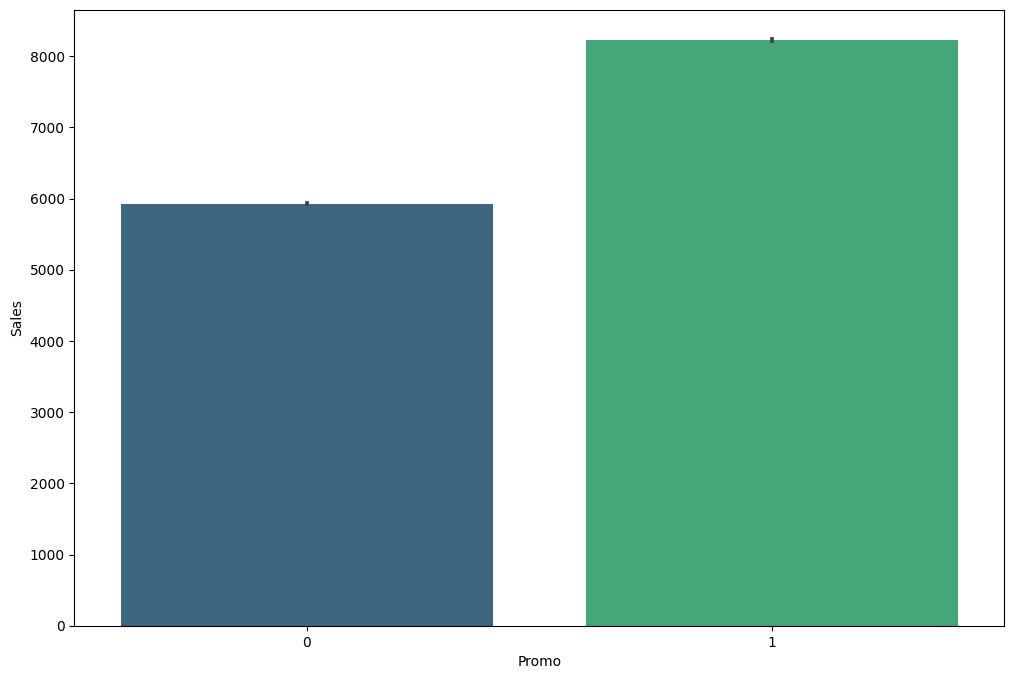

In [60]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=df, palette='viridis')

Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

#### Chart - 10

<Axes: >

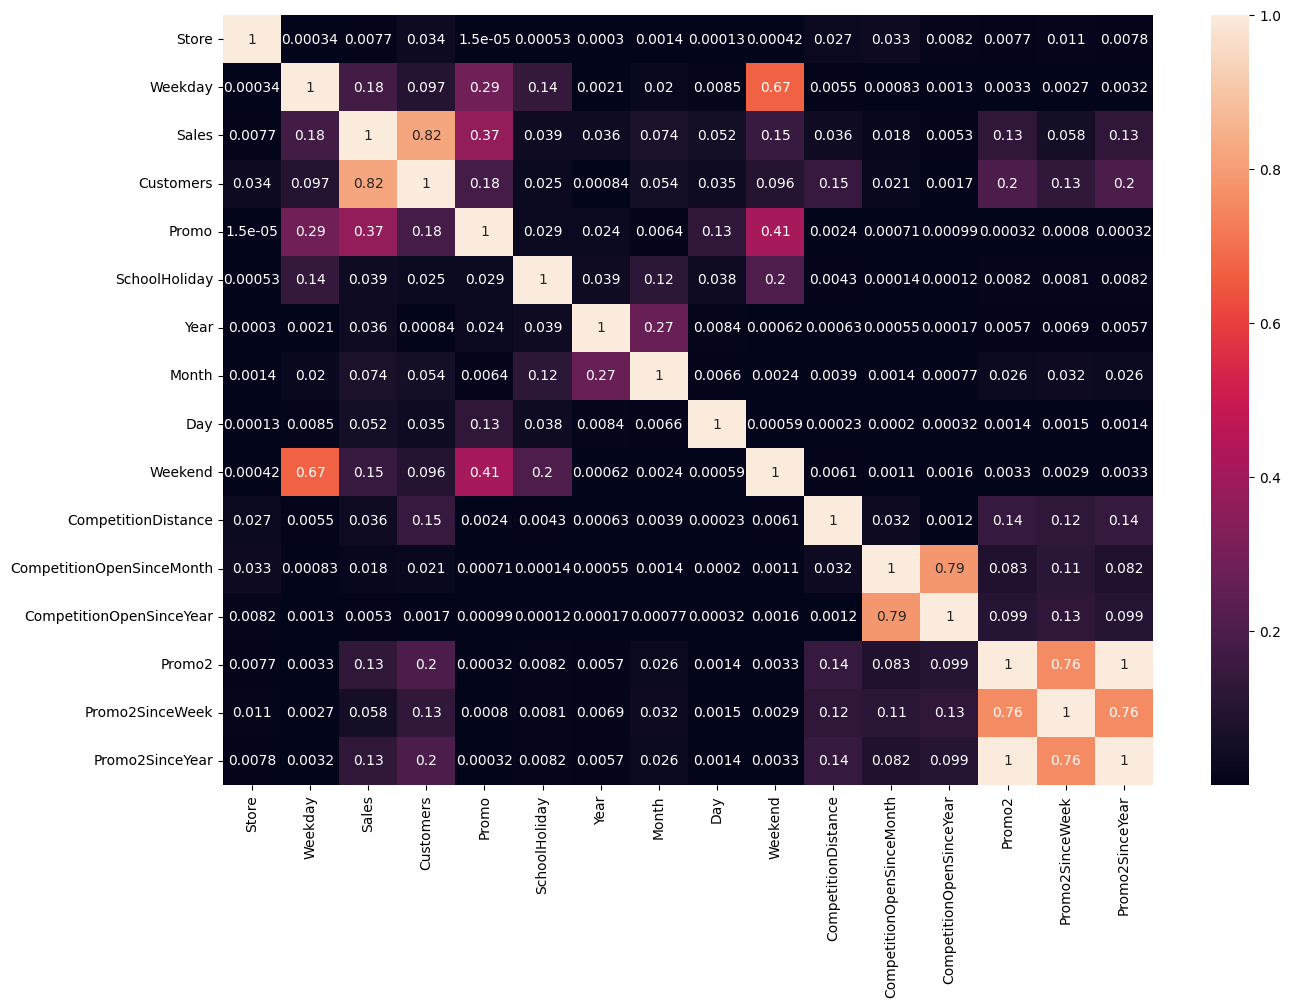

In [61]:
# Now let's visualise for the correlation among all variables.
plt.figure(figsize = (15,10))
sns.heatmap(abs(df.corr()), annot = True)

## ***5. Feature Engineering & Data Pre-processing***

### Multicollinearity

Multicollinearity is a statistical term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other.

In [62]:
# Defining a function calc_vif to calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [63]:
# Calculating the VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.030699e+00
1,Weekday,9.381469e+00
2,Customers,5.217864e+00
3,Promo,2.288766e+00
4,SchoolHoliday,1.319086e+00
5,Year,2.828420e+01
6,Month,4.170063e+00
7,Day,4.417196e+00
8,Weekend,2.496299e+00
9,CompetitionDistance,1.584958e+00


In [64]:
# Dealing with multicollinearity using VIF analysis.
# Calculating the VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Year','Promo2SinceYear', 'Weekend']]])

,variables,VIF
0,Store,3.612927
1,Weekday,4.306986
2,Customers,4.268165
3,Promo,1.910253
4,SchoolHoliday,1.272439
5,Month,3.747233
6,Day,3.744487
7,CompetitionDistance,1.480676
8,CompetitionOpenSinceMonth,6.091867
9,CompetitionOpenSinceYear,8.046782


In [65]:
df = df.drop(['Year','Promo2SinceYear', 'Weekend'], axis = 1)

###  Categorical Encoding

In [66]:
#getting the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Store                      844338 non-null  int64 
 1   Weekday                    844338 non-null  int64 
 2   Sales                      844338 non-null  int64 
 3   Customers                  844338 non-null  int64 
 4   Promo                      844338 non-null  int64 
 5   StateHoliday               844338 non-null  object
 6   SchoolHoliday              844338 non-null  int64 
 7   Month                      844338 non-null  int64 
 8   Day                        844338 non-null  int64 
 9   StoreType                  844338 non-null  object
 10  Assortment                 844338 non-null  object
 11  CompetitionDistance        844338 non-null  int64 
 12  CompetitionOpenSinceMonth  844338 non-null  int64 
 13  CompetitionOpenSinceYear   844338 non-null  

In [67]:
# change Data Types object into int
df = pd.get_dummies(df, columns = ['StoreType','Assortment','PromoInterval', 'StateHoliday'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Store                           844338 non-null  int64
 1   Weekday                         844338 non-null  int64
 2   Sales                           844338 non-null  int64
 3   Customers                       844338 non-null  int64
 4   Promo                           844338 non-null  int64
 5   SchoolHoliday                   844338 non-null  int64
 6   Month                           844338 non-null  int64
 7   Day                             844338 non-null  int64
 8   CompetitionDistance             844338 non-null  int64
 9   CompetitionOpenSinceMonth       844338 non-null  int64
 10  CompetitionOpenSinceYear        844338 non-null  int64
 11  Promo2                          844338 non-null  int64
 12  Promo2SinceWeek                 844338 non-n

###  Data Splitting

In [69]:
# Create the data of independent variables
x = df.drop(['Sales'], axis = 1).values # independent variable

# Create the data of dependent variable
y = df['Sales'].values # dependent variable

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [71]:
# Printing the shape of the train and test dataset
print(x_train.shape)
print(x_test.shape)

(591036, 27)
(253302, 27)


###  Data Scaling

In [72]:
# Scaling your data
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [73]:
# Getting the coeficient after scaling
x_train

array([[0.50987433, 0.5       , 0.1339774 , ..., 0.        , 0.        ,
        0.        ],
       [0.93716338, 0.83333333, 0.11192125, ..., 0.        , 0.        ,
        0.        ],
       [0.09964093, 0.33333333, 0.12504557, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83123878, 0.33333333, 0.12231134, ..., 0.        , 0.        ,
        0.        ],
       [0.47755835, 0.        , 0.2034269 , ..., 0.        , 0.        ,
        0.        ],
       [0.52513465, 0.33333333, 0.44750273, ..., 0.        , 0.        ,
        0.        ]])

## ***6. ML Model Implementation***

### ML Model - 1 Linear Regression

In [74]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [75]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [76]:
#Prediction the value
y_pred = lr.predict(x_test)
y_pred

array([5258., 9868., 8810., ..., 5500., 4002., 6394.])

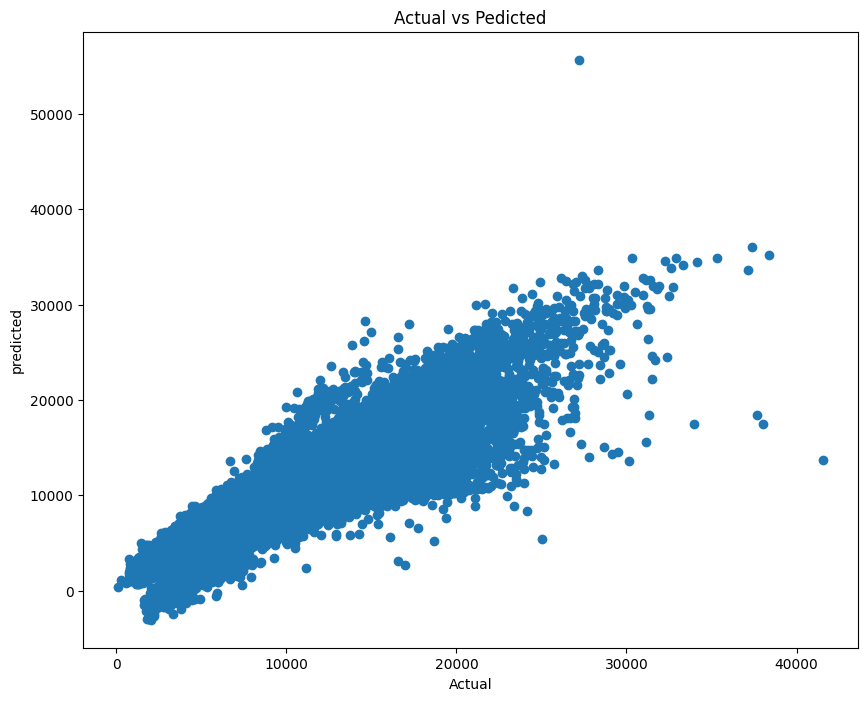

In [77]:
# Visualizing the actual and predicted values
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [78]:
# Getting the difference between actial and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
218846,7460,7652.0,-192.0
174396,11217,11128.0,89.0
31949,7439,6694.0,745.0
140205,5941,6004.0,-63.0
199890,7860,9234.0,-1374.0
150454,9965,8826.0,1139.0
60314,11995,11180.0,815.0
29106,12314,9144.0,3170.0
42064,18179,19476.0,-1297.0
39206,7670,8346.0,-676.0


In [79]:
# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 1691308.5788702813
RMSE : 1300.5032021760967
R2 Linear regression : 82.43014464486723


### ML Model - 2 Ridge

In [80]:
# Importing the Packages
from sklearn.linear_model import Ridge

In [81]:
# Training the model
ridgeregressor = Ridge(alpha = 1)
ridgeregressor.fit(x_train, y_train)

Ridge(alpha=1)

In [82]:
# Predicting the model
ridge_y_pred = ridgeregressor.predict(x_test)
ridge_y_pred

array([5254.90582885, 9862.95254569, 8808.61974856, ..., 5498.00881366,
       3997.38965642, 6392.34137461])

In [83]:
(ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100

(82.56528783604806, 82.43054263131094)

In [84]:
# Coefficient Difference
ridge_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Ridge coefficient': ridgeregressor.coef_ , 'Difference' : lr.coef_ - ridgeregressor.coef_})
ridge_coef.head()

,lr coefficient,Ridge coefficient,Difference
0,-134.510191,-134.283482,-0.226708
1,-237.251266,-242.664790,5.413523
2,40399.711245,40388.385322,11.325923
3,1148.300158,1148.859168,-0.559010
4,38.230279,37.466390,0.763889


In [85]:
MSE_ridge = mean_squared_error(y_test, ridge_y_pred)
print("MSE :",MSE_ridge)

RMSE_ridge = np.sqrt(MSE)
print("RMSE :", RMSE_ridge)

r2_ridge = r2_score(y_test, ridge_y_pred)
print("R2 Ridge :" ,(r2_ridge)*100)


MSE : 1691270.2679182037
RMSE : 1300.5032021760967
R2 Ridge : 82.43054263131094


### ML Model - 3 Lasso

In [86]:
# Impoting the lasso regression
from sklearn.linear_model import Lasso

In [87]:
# Training the model
lassoregressor = Lasso(alpha = 0.01)
lassoregressor.fit(x_train, y_train)

Lasso(alpha=0.01)

In [88]:
# Predicting the model
lasso_y_pred = lassoregressor.predict(x_test)
lasso_y_pred

array([5254.51995513, 9864.11795004, 8809.29792504, ..., 5497.64242635,
       3997.0463246 , 6391.2276783 ])

In [89]:
(lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100

(82.5652832210641, 82.43035623848732)

In [90]:
# Calculating the performance metrics.
MSE_lasso = mean_squared_error(y_test, lasso_y_pred)
print("MSE :",MSE_lasso)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :", RMSE_lasso)

r2_lasso = r2_score(y_test, lasso_y_pred)
print("R2 Lasso :" ,(r2_lasso)*100)

MSE : 1691288.210455308
RMSE : 1300.5032021760967
R2 Lasso : 82.43035623848732


In [91]:
# Coeficient difference
lasso_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Lasso coefficient': lassoregressor.coef_ , 'Difference' : lr.coef_ - lassoregressor.coef_})
lasso_coef.head()

,lr coefficient,Lasso coefficient,Difference
0,-134.510191,-134.237015,-0.273176
1,-237.251266,-242.343414,5.092147
2,40399.711245,40404.105209,-4.393964
3,1148.300158,1148.418202,-0.118045
4,38.230279,37.495317,0.734963


In [92]:
print("Linear Regression : ", (lr.score(x_train, y_train))*100,",", (lr.score(x_test, y_test))*100)
print("Ridge Regressor : ", (ridgeregressor.score(x_train, y_train))*100,",", (ridgeregressor.score(x_test, y_test))*100)
print("Lasso Regressor : ", (lassoregressor.score(x_train, y_train))*100,",", (lassoregressor.score(x_test, y_test))*100)


Linear Regression :  82.5649952767598 , 82.43014464486723
Ridge Regressor :  82.56528783604806 , 82.43054263131094
Lasso Regressor :  82.5652832210641 , 82.43035623848732


In [93]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                               'Ridge Regressor': ((ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100),
                              'Lasso Regressor': ((lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100)})




In [94]:
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,82.564995,82.430145
Ridge Regressor,82.565288,82.430543
Lasso Regressor,82.565283,82.430356


# **Conclusion**

This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis.

After Performing different Analysis, we got the following results,

A) Linear Regression Analysis = 82.564995, 82.430145

B) Elastic Regression

Ridge Regression = 82.565288, 82.430543

Lasso Regression = 82.565283, 82.430356

 As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values.

With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.

#**Thank you so much**